In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
df =pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


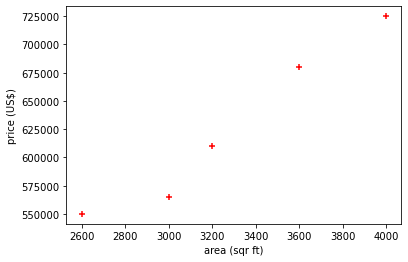

In [8]:
%matplotlib inline
plt.xlabel('area (sqr ft)')
plt.ylabel('price (US$)')
plt.scatter(df.area,df.price, color='red', marker='+')

In [12]:
new_df = df.drop('price', axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [13]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [14]:
# Create Linear Regression Object
reg = linear_model.LinearRegression()
reg.fit(new_df, price)

LinearRegression()

**(1) Predict price of a home with area = 3300 sqr ft**

In [15]:
reg.predict([[3300]])

array([628715.75342466])

In [16]:
reg.coef_

array([135.78767123])

In [17]:
reg.intercept_

180616.43835616432

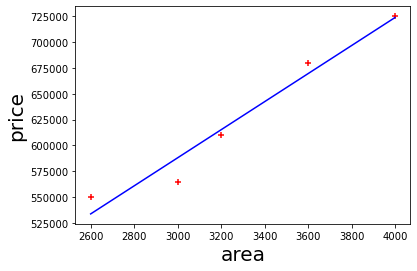

In [32]:
%matplotlib inline
plt.xlabel('area', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color='blue')

**Y = m * X + b (m is coefficient and b is intercept)**

In [18]:
3300*135.78767123+180616.43835616432

628715.7534151643

**(2) Predict price of a homw with area = 5000 sqr ft**

In [19]:
reg.predict([[5000]])

array([859554.79452055])

# Generate CSV file with list of home price predictions

In [22]:
area_df = pd.read_csv("areas.csv")
area_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [24]:
p = reg.predict(area_df)

In [26]:
area_df['prices'] = p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [28]:
area_df.to_csv("prediction.csv", index=False)

# Exercise


Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020

In [37]:
canada_df = pd.read_csv("canada_per_capita_income.csv")
canada_df.head(3)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484


In [40]:
canada_df['per_capita_income'] = canada_df['per capita income (US$)']
canada_df = canada_df.drop('per capita income (US$)', axis='columns')
canada_df.head(3)

,year,per_capita_income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484


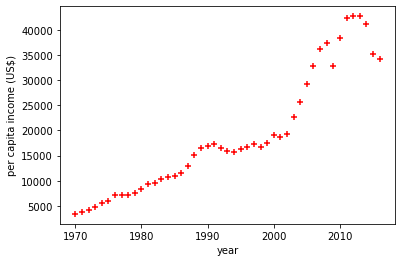

In [42]:
%matplotlib inline
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(canada_df.year, canada_df.per_capita_income, color='red', marker='+')

In [48]:
year = canada_df.drop('per_capita_income', axis='columns')
year.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [46]:
income = canada_df.per_capita_income
income.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per_capita_income, dtype: float64

In [49]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(year,income)

LinearRegression()

In [50]:
reg.predict([[2020]])

array([41288.69409442])